## Blood Mask EDA

Take a look at the data I have now - how a blood mask png generated on Pixelmator looks:

In [1]:
from PIL import Image
import numpy as np

mask = Image.open('/notebooks/triage/hemofpn/data_v2/train/masks/02.png')

mask_arr = np.array(mask)
mask_arr.shape

(723, 758, 4)

In [2]:
np.unique(mask_arr)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

What does the image itself look like?

In [3]:
from PIL import Image
import numpy as np

image = Image.open('/notebooks/triage/hemofpn/data_v2/train/images/02.png')

image_arr = np.array(image)
image_arr.shape

(723, 758, 4)

In [4]:
def pad_im(image, target_shape=(768, 768)):
        if image.ndim == 3 and (image.shape[2] == 3 or image.shape[2] == 1):  # If image is in HWC format
            h, w, c = image.shape
            image = np.transpose(image, (2, 0, 1))  # Convert to CHW for processing
        elif image.ndim == 3 and (image.shape[0] == 3 or image.shape[0] == 1):  # If image is in CHW format
            c, h, w = image.shape
            # image = np.transpose(image, (1, 2, 0))  # Convert to HWC for processing
        elif image.ndim == 2:
            h, w = image.shape
        else:
            raise ValueError("Unexpected image format, image is of shape:", image.shape)
        
        scale = min(target_shape[0] / h, target_shape[1] / w)
        new_h, new_w = int(h * scale), int(w * scale)

        # Ensure dimensions are divisible by 32
        new_h = ((new_h + 31) // 32) * 32
        new_w = ((new_w + 31) // 32) * 32

        resized_image = np.array([cv2.resize(img, (new_w, new_h)) for img in image])

        pad_h = max(target_shape[0] - new_h, 0)
        pad_w = max(target_shape[1] - new_w, 0)
        pad_top = pad_h // 2
        pad_bottom = pad_h - pad_top
        pad_left = pad_w // 2
        pad_right = pad_w - pad_left

        padded_im = np.pad(resized_image, ((0, 0), (pad_top, pad_bottom), (pad_left, pad_right)), mode='constant')

        return padded_im

In [5]:
!pip install opencv-python

In [6]:
import matplotlib.pyplot as plt

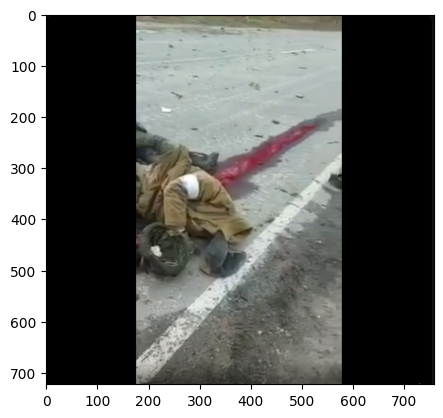

In [7]:
import cv2

image = cv2.imread('/notebooks/triage/hemofpn/data_v2/train/images/02.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
image.shape

(723, 758, 3)

In [9]:
image = np.transpose(image, (2, 0, 1))
image.shape

(3, 723, 758)

In [10]:
image = pad_im(image)
image.shape

(3, 768, 768)

Ok, after padding the image has this shape.

How does a blood mask png from F8 look?

In [12]:
mask_f8 = Image.open('/notebooks/triage/hemofpn/data_f8/train/masks/adt2_image_1121.png')

mask_f8 = np.array(mask_f8)
mask_f8.shape

(1440, 1920, 4)

In [13]:
np.unique(mask_f8)

array([  0, 255], dtype=uint8)

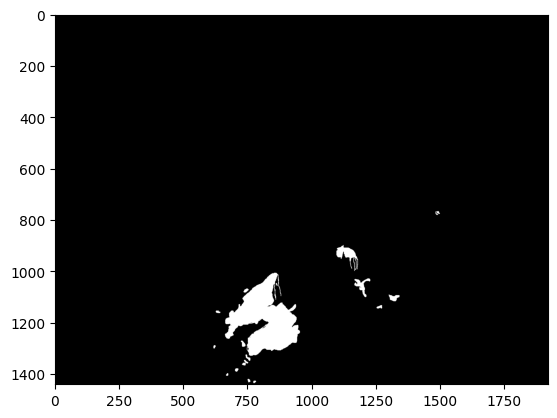

In [14]:
import cv2

image = cv2.imread('/notebooks/triage/hemofpn/data_f8/train/masks/adt2_image_1121.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [15]:
image.shape

(1440, 1920, 3)

Looks ok - the only difference is that with F8 masks the constituent values are only 0 and 255. 